In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data

In [2]:
data = pd.read_csv('Elon_musk.csv',encoding = 'latin1')
data.head()

,S.no.,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   S.no.   1999 non-null   int64 
 1   Text    1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [4]:
data.shape

(1999, 2)

In [5]:
data1 = list(np.array(data['Text']))
data1

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [6]:
nlp = spacy.load('en_core_web_sm')

In [7]:
#Using spacy for Tokenizing our dataset
doc_sen = []
for sen in data1:
    doc = nlp(sen)
    doc_sen.append(doc)

In [8]:
#Tokenized Sentences
doc_sen

[@kunalb11 Im an alien,
 @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?,
 @joerogan @Spotify Great interview!,
 @gtera27 Doge is underestimated,
 @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!,
 Happy New Year of the Ox! https://t.co/9WFKMYu2oj,
 Frodo was the underdoge,
 All thought he would fail,
 Himself most of all. https://t.co/zGxJFDzzrM,
 @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),
 @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.,
 The most entertaining outcome is the most likely,
 @GiveDirectly Just sent some,
 Just agree to do Clubhouse with @kanyewest,
 https://t.co/3rWE9uHSTS,
 @geoffkeighley @UnrealEngine Its getting real,
 Bought some Dogecoin for lil X, so he can be a toddler hodler,
 @JoshManMode He definitely has issues, but the sentencing seems a bit high,
 @freewalletorg Thanks for fixing,
 @freewalletorg Please unlock my accoun

In [9]:
#Tokens present in Sentences
for doc in doc_sen:
    for token in doc:
        print(token.text,end = '||||')
    print('\n')

@kunalb11||||Im||||an||||alien||||

@ID_AA_Carmack||||Ray||||tracing||||on||||Cyberpunk||||with||||HDR||||is||||next||||-||||level||||.||||Have||||you||||tried||||it||||?||||

@joerogan||||@Spotify||||Great||||interview||||!||||

@gtera27||||Doge||||is||||underestimated||||

@teslacn||||Congratulations||||Tesla||||China||||for||||amazing||||execution||||last||||year||||.||||Now||||on||||to||||the||||next||||for||||even||||more||||!||||!||||

Happy||||New||||Year||||of||||the||||Ox||||!||||https://t.co/9WFKMYu2oj||||

Frodo||||was||||the||||underdoge||||,||||
||||All||||thought||||he||||would||||fail||||,||||
||||Himself||||most||||of||||all||||.||||https://t.co/zGxJFDzzrM||||

@OwenSparks||||_||||@flcnhvy||||@anonyx10||||Haha||||thanks||||:)||||

@flcnhvy||||@anonyx10||||Indeed||||!||||Tweets||||definitely||||do||||not||||represent||||real||||-||||world||||time||||allocation||||.||||

The||||most||||entertaining||||outcome||||is||||the||||most||||likely||||

@GiveDirectly||||Just||||s


0||||to||||155||||mph||||trap||||speed||||in||||a||||1/4||||mile||||.||||200||||mph||||top||||speed||||(||||with||||right||||tires||||)||||.||||

First||||production||||car||||ever||||to||||achieve||||0||||to||||60||||mph||||in||||less||||than||||2||||seconds||||

It||||can||||play||||Cyberpunk||||

Plaid||||Model||||S||||ships||||next||||month||||https://t.co/HFUPTnQiPB||||

Even||||Discord||||has||||gone||||corpo||||||||

@Jason||||Yup||||.||||Wild||||times||||on||||Discord||||haha||||.||||

https://t.co/F23fxQkBCE||||

@AndyColt2||||Waiting||||for||||FAA||||review||||||||

Gamestonk||||!||||!||||
||||https://t.co/RZtkDzAewJ||||

@LabPadre||||Passed||||initial||||pressure||||test||||

@AdamHoov||||Yes||||

@PPathole||||https://t.co/v7cffwac0A||||

Bought||||a||||hand||||knit||||wool||||Marvin||||the||||Martian||||helm||||for||||my||||dog||||

https://t.co/gpcvjIBTLM||||

I||||kinda||||love||||Etsy||||

@thesheetztweetz||||It||||does||||not||||serve||||the||||public||||to||||hamstr

@RationalEtienne||||@biogirl09||||@ErcXspace||||Legs||||would||||certainly||||work||||,||||but||||best||||part||||is||||no||||part||||,||||best||||step||||is||||no||||step||||

@flcnhvy||||@ErcXspace||||Yes||||

@flcnhvy||||@ErcXspace||||Saves||||mass||||&||||amp||||;||||cost||||of||||legs||||&||||amp||||;||||enables||||immediate||||repositioning||||of||||booster||||on||||to||||launch||||mount||||||||rea|||| ||||https://t.co/jwDCjArymJ||||

@ErcXspace||||Were||||going||||to||||try||||to||||catch||||the||||Super||||Heavy||||Booster||||with||||the||||launch||||tower||||arm||||,||||using||||the||||grid||||fins||||to||||take||||the||||load||||

Snake||||-||||head||||dog||||had||||my||||undivided||||attention||||until||||winder||||-||||head||||ostrich||||came||||gliding||||through||||all||||nonchalant||||https://t.co/dtPMdM3TQp||||

@Tesmanian_com||||Seems||||odd||||that||||the||||opposition||||group||||is||||from||||BMWs||||home||||state||||of||||Baveria||||.||||Thats||||very||||far||

@PPathole||||@ErcXspace||||@SpaceX||||I||||still||||have||||a||||soft||||spot||||in||||my||||heart||||for||||transpiration||||cooking||||.||||In||||theory||||,||||it||||would||||us|||| ||||https://t.co/9SsChDKFAD||||

@ErcXspace||||@SpaceX||||Ship||||leeward||||side||||will||||be||||bare||||metal||||,||||windward||||will||||have||||black||||,||||hexagonal||||heat||||shield||||tiles||||

RT||||@Pockn_CG||||:||||Ca||||n't||||wait||||!||||!||||@elonmusk||||#||||spacex||||#||||SpaceXStarship||||https://t.co/ynEtMywFvg||||

@conexionspacial||||@Pockn_CG||||Yes||||

@SpacePadreIsle||||@SpaceX||||Agreed||||,||||should||||be||||preserved||||in||||memory||||of||||SN8||||

RT||||@SpaceX||||:||||Photos||||from||||Starship||||SN8s||||flight||||test||||<||||U+2192||||>||||https://t.co/095WHX44BX||||https://t.co/5OzLYF7QRf||||

@NASASpaceflight||||@BocaChicaGal||||Exactly||||!||||Woohoo||||!||||!||||

@Erdayastronaut||||@SpaceX||||SN8||||did||||great||||!||||Even||||reaching||||apogee||||wouldve|

@teslaownerssv||||@AstroJordy||||@flcnhvy||||No||||,||||just||||a||||mild||||cold||||.||||Same||||with||||my||||bro||||.||||Def||||had||||cov2||||though||||.||||Pc&lt;20||||means||||viral|||| ||||https://t.co/UySAnpqtFI||||

@Astronomiaum||||Life||||in||||glass||||domes||||at||||first||||.||||Eventually||||,||||terraformed||||to||||support||||life||||,||||like||||Earth||||.||||

@AstroJordy||||@flcnhvy||||Yeah||||

@Daywalker_xD||||@Astronomiaum||||I||||was||||going||||to||||say||||Sim!||||,||||but||||that||||seemed||||too||||obvious||||haha||||

@Astronomiaum||||Deveras||||!||||

@flcnhvy||||And||||cases||||with||||high||||(||||non||||-||||infectious||||)||||Ct||||should||||quarantine||||for||||a||||few||||days||||,||||while||||getting||||another||||test||||.||||Seco|||| ||||https://t.co/oAlvZwCMIO||||

@tobyliiiiiiiiii||||So||||many||||things||||you||||want||||&||||amp||||;||||some||||you||||didnt||||know||||you||||wanted||||

@nichegamer||||Maybe||||a||||little||||Mercy|||| ||

Such||||a||||privilege||||to||||work||||with||||people||||I||||like||||&||||amp||||;||||respect||||so||||much||||.||||I||||feel||||blessed||||.||||

RT||||@Commercial_Crew||||:||||The||||Flight||||Readiness||||Review||||for||||the||||Crew-1||||mission||||to||||the||||@Space_Station||||has||||concluded||||,||||and||||@NASA||||and||||@SpaceX||||are||||GO||||t||||||||

RT||||@SpaceX||||:||||Falcon||||9||||and||||Crew||||Dragon||||vertical||||on||||Launch||||Complex||||39A||||https://t.co/hBVUHWv3Ab||||

@DJSnM||||@DavidHuber15||||@nickhenning3d||||@SpaceX||||@ErcXspace||||@Neopork85||||@C_Bass3d||||@Caspar_Stanley||||@SpacexVision||||@FelixSchlang||||Probably||||

@TeslaNY||||@Tesla||||Happy||||to||||see||||this||||:)||||

@SamTalksTesla||||@Tesla||||I||||do||||expect||||this||||to||||become||||an||||important||||product||||for||||the||||world||||,||||but||||probably||||not||||financially||||material||||for||||Tesla||||

@nickhenning3d||||@SpaceX||||@ErcXspace||||@Neopork85||||@C_Bass3d|

@WholeMarsBlog||||<||||U+0001F4AB||||>||||<||||U+0001F6F0||||>||||

@HyperChangeTV||||Tesla||||team||||has||||done||||great||||work||||!||||

@HyperChangeTV||||Well||||,||||tbh||||,||||our||||capex||||efficiency||||in||||2017||||was||||trash||||<||||U+0001F62C||||>||||

@westcoastbill||||Testing||||for||||covid||||is||||a||||license||||to||||print||||money||||

@arctechinc||||@Tesla||||Yes||||,||||very||||helpful||||.||||Thanks||||all||||beta||||testers||||!||||

@Erdayastronaut||||Video||||training||||&||||amp||||;||||inference||||is||||essential||||for||||excellent||||autonomy||||

@engineers_feed||||Sigh|||| ||||there||||should||||be||||a||||new||||supersonic||||jet||||,||||this||||time||||electric||||

@WorldAndScience||||Critical||||to||||humanitys||||future||||

Congratulations||||SpaceX||||Team||||!||||https://t.co/nO1Z98a94f||||

@TesLatino||||Mine||||is||||a||||few||||days||||ahead||||

@EliBurton||||_||||@teslaownersSV||||Sure||||,||||it||||could||||be||||an||||option||||in

RT||||@SpaceX||||:||||Starman||||,||||last||||seen||||leaving||||Earth||||,||||made||||its||||first||||close||||approach||||with||||Mars||||todaywithin||||0.05||||astronomical||||units||||,||||or||||under||||5||||mill||||||||

@EVHQ2||||@TashaARK||||Meant||||to||||say||||that||||it||||should||||be||||fixed||||in||||the||||latest||||wide||||release||||.||||Wont||||need||||to||||wait||||for||||FSD||||.||||

@EVHQ2||||@TashaARK||||It||||should||||be||||

@franktinsley||||@ankitXupta||||@TashaARK||||Exactly||||.||||We||||barked||||up||||that||||tree||||for||||way||||too||||long||||(||||sigh||||)||||.||||Gives||||a||||false||||sense||||of|||| ||||https://t.co/aIGaEnC8f0||||

@PicklePunchD||||@PPathole||||@TashaARK||||Yes||||,||||we||||will||||play||||sexy||||snake||||jazz||||<||||U+0001F923||||>||||

@ZainRaz4||||@PPathole||||@TashaARK||||Yes||||

@PPathole||||@TashaARK||||Yeah||||,||||provided||||we||||do||||our||||metal||||gear||||snake||||autocoupler||||

@TashaARK||||Waymo||||is||||

@ArtifactsHub||||That||||species||||has||||stood||||the||||test||||of||||time||||

@flcnhvy||||@NASASpaceflight||||@austinbarnard45||||@PPathole||||Mostly||||304L||||,||||some||||301||||.||||Broke||||at||||301||||to||||304||||interface||||.||||SN9||||will|||| ||||https://t.co/wpePRV5S4r||||

@NASASpaceflight||||@austinbarnard45||||@PPathole||||8||||bar||||differential||||in||||ullage||||,||||9||||bar||||at||||base||||due||||to||||propellant||||head||||.||||It|||| ||||https://t.co/QvGKYW2qd0||||

@PPathole||||We||||just||||need||||enough||||height||||to||||test||||body||||flaps||||&||||amp||||;||||drawing||||propellant||||from||||headers||||vs||||main||||tanks||||.||||Will||||do||||se|||| ||||https://t.co/PGzAfeSC7X||||

First||||flight||||is||||to||||15||||km||||or||||~50,000||||ft||||

Nosecone||||&||||amp||||;||||front||||flaps||||next||||week||||.||||SN9||||next||||month||||.||||

Starship||||SN8||||with||||rear||||body||||flaps||||https://t.co/GdxMbzX0ct||||

@waitbutwhy||||htt


@CharlieMunger00||||@UniverCurious||||Munger||||is||||right||||

@eugenelee3||||@UniverCurious||||https://t.co/f8rWY4ExeE||||

@UniverCurious||||Black||||-||||Scholes||||formula||||is||||kinda||||bs||||.||||Big||||difference||||between||||a||||finance||||approximation||||&||||amp||||;||||fundamental||||physics||||/||||pure||||math||||.||||

@wintonARK||||True||||

@DisruptResearch||||Tesla||||is||||best||||understood||||as||||a||||collection||||of||||about||||a||||dozen||||startups||||,||||mostly||||in||||series||||,||||increasingly|||| ||||https://t.co/zYnsXiSP4N||||

@DisruptResearch||||Tesla||||R&amp;D||||productivity||||is||||exceptionally||||good||||due||||to||||the||||caliber||||of||||engineering||||talent||||

Tesla||||Model||||S||||&||||amp||||;||||X||||have||||hospital||||-||||grade||||(||||HEPA||||)||||air||||filters||||.||||3||||&||||amp||||;||||Y||||are||||really||||good||||too||||.||||This||||has||||a||||big||||effect||||on||||healt|||| ||||https://t.co/ytsK3LmfiI||||



<||||U+0001F40D><U+0001F3B7||||>||||

@WholeMarsBlog||||Its||||quite||||hard||||for||||us||||to||||write||||the||||software||||needed||||to||||cover||||basic||||car||||functionality||||,||||but||||maybe||||we||||c|||| ||||https://t.co/YWLQuX5rbv||||

GPT-3||||sounds||||like||||Simon||||&||||amp||||;||||Garfunkel||||lyrics||||

Bureaucracy||||is||||inherently||||kafkaesque||||

@Tesmanian_com||||Dankeschön||||Brandenburg||||&||||amp||||;||||Grünheide||||!||||

@harsimranbansal||||@EvaFoxU||||True||||<||||U+0001F923><U+0001F923||||>||||

@GeffenAvraham||||@BryanFlanks||||@SpellMender||||@VladKarmon||||@torybruno||||@ULAEngineer||||@SpaceX||||<||||U+0001F446||||>||||

Medical||||check||||is||||A||||-||||ok||||!||||https://t.co/zTRMvQ6Wvx||||

He||||might||||run||||for||||President||||in||||2024||||https://t.co/Wo34fhKugu||||

@Erdayastronaut||||@nextspaceflight||||Not||||having||||long||||chain||||hydrocarbons||||&||||amp||||;||||lowering||||preburner||||combustion||||temperature||||mak

@Mark_Goldberg||||_||||@Tesla||||Note||||the||||fabulous||||plaid||||jacket||||&||||amp||||;||||gingham||||shirt||||combo||||<||||U+0001F923||||>||||

@archillect||||Twin||||Peaks||||

@SamTalksTesla||||Working||||on||||my||||Moms||||cousins||||farm||||in||||Saskatchewan||||at||||age||||17||||.||||I||||think||||we||||did||||a||||barn||||-||||raising||||that||||day||||.||||

@wonderofscience||||https://t.co/y7LrlouXr9||||

@Erdayastronaut||||Not||||sure||||yet||||,||||but||||hopefully||||.||||Will||||need||||leg||||&||||amp||||;||||other||||repairs||||.||||Probably||||SN6||||flies||||before||||SN5||||.||||We||||need|||| ||||https://t.co/CGXSNck6uv||||

@lexfridman||||Clearly||||

RT||||@Erdayastronaut||||:||||Spot||||the||||tiny||||humans||||!||||!||||!||||This||||shot||||really||||puts||||it||||into||||scale||||!||||!||||!||||A||||full||||blown||||Starship||||and||||SuperHeavy||||will||||be||||hard||||to||||fat||||||||

@ramacvr||||@Kristennetten||||@PPathole||||@BernieSanders||||A

@RationalEtienne||||@atNickVega||||@TheOnion||||<||||U+0001F923><U+0001F923||||>||||

Hold||||my||||beer||||https://t.co/IK3tT1x4wP||||

@TheOnion||||Once||||an||||Onion||||,||||now||||a||||Rose||||

@atNickVega||||@TheOnion||||Wow||||,||||you||||think||||about||||me||||a||||lot||||!||||

@YourAnonNews||||You||||dropped||||this||||

@YourAnonNews||||<||||U+0001F339||||>||||

@EvaFoxU||||Haha||||

RT||||@teslacn||||:||||Pick||||up||||the||||energetic||||wallpapers||||,||||and||||charge||||your||||everyday||||adventure||||!||||https://t.co/HOTDtLpdpw||||

@cleantechnica||||Giga||||Berlin||||will||||come||||together||||at||||an||||impossible||||-||||seeming||||speed||||.||||The||||prefabricated||||construction||||method|||| ||||https://t.co/x2DRFewiAL||||

Almost||||a||||decade||||ago||||.||||Original||||Dragon||||in||||background||||.||||

@PPathole||||@RhiddhiD||||Ya||||just||||cant||||beat||||BR||||

https://t.co/Ufay65lZJj||||

@AVRWC||||Planet||||Claire||||is||||<||||U+0001F525><U+

@Erdayastronaut||||@flcnhvy||||@SpaceX||||Yeah||||,||||will||||take||||less||||than||||a||||minute||||to||||order||||on||||https://t.co/Q1VvqVmJ2i||||when||||it||||goes||||live||||

@flcnhvy||||@SpaceX||||Starlink||||terminal||||has||||motors||||to||||self||||-||||orient||||for||||optimal||||view||||angle||||.||||No||||expert||||installer||||required||||.|||| ||||https://t.co/xndTXRDnl2||||

@niksanae||||Ok||||

@alex_avoigt||||@WholeMarsBlog||||<||||U+0001F914||||>||||

@Erdayastronaut||||@thesheetztweetz||||@BryceSpaceTech||||@SpaceX||||@ulalaunch||||@torybruno||||@MHI_Group||||@roscosmos||||@Peter_J_Beck|||| ||||https://t.co/irMxFy991y||||

@TeslaAircraft||||@flcnhvy||||@Tesla||||Exactly||||

@WholeMarsBlog||||Tesla||||Autopilot||||was||||literally||||named||||after||||the||||term||||used||||in||||aviation||||.||||Also||||,||||what||||about||||Autobahn||||!||||?||||

@teslaownersSV||||@engineers_feed||||The||||strength||||&||||amp||||;||||perseverance||||of||||the||||people||||of|

In [10]:
#Visualize NER
for doc in doc_sen:
    displacy.render(doc, style='ent', jupyter=True)
    print('\n')

C:\Users\ayush\Anaconda3\lib\site-packages\spacy\displacy\__init__.py:205: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [11]:
data2 = data.copy()
data2.head()

,S.no.,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [12]:
#Impliment word tokenize using NLTK
data2['Text'].dropna(inplace=True)
tokens = data2['Text'].apply(word_tokenize)
data2

,S.no.,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [13]:
#Removing unwanted symbole incase if exist
ip_rev_string = []
for string in data1:
    string = re.sub("[^A-Za-z]+"," ",string = string).lower()
    ip_rev_string.append(string)

ip_rev_string

[' kunalb i m an alien',
 ' id aa carmack ray tracing on cyberpunk with hdr is next level have you tried it ',
 ' joerogan spotify great interview ',
 ' gtera doge is underestimated',
 ' teslacn congratulations tesla china for amazing execution last year now on to the next for even more ',
 'happy new year of the ox https t co wfkmyu oj',
 'frodo was the underdoge all thought he would fail himself most of all https t co zgxjfdzzrm',
 ' owensparks flcnhvy anonyx haha thanks ',
 ' flcnhvy anonyx indeed tweets definitely do not represent real world time allocation ',
 'the most entertaining outcome is the most likely',
 ' givedirectly just sent some',
 'just agree to do clubhouse with kanyewest',
 'https t co rwe uhsts',
 ' geoffkeighley unrealengine it s getting real',
 'bought some dogecoin for lil x so he can be a toddler hodler',
 ' joshmanmode he definitely has issues but the sentencing seems a bit high',
 ' freewalletorg thanks for fixing',
 ' freewalletorg please unlock my account'

## Sentiment Analysis using NLTK

In [14]:
sia = SentimentIntensityAnalyzer()

In [15]:
def get_vader_sentiment(review): 

    sia = SentimentIntensityAnalyzer()
    # create TextBlob object of passed tweet text 
    analysis = sia.polarity_scores(review)
    # set sentiment 
    if analysis["compound"] > 0: 
        return 'positive'
    elif analysis["compound"] < 0: 
        return 'negative'
    else: 
        return 'neutral'

In [16]:
sentiment = []
for review in ip_rev_string:
    sent = get_vader_sentiment(review)
    sentiment.append(sent)
    
sentiment

['neutral',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 '

In [17]:
final_data = data.copy()
final_data['sentiment_nltk'] = sentiment
final_data.head()

,S.no.,Text,sentiment_nltk
0,1,@kunalb11 Im an alien,neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,neutral
2,3,@joerogan @Spotify Great interview!,positive
3,4,@gtera27 Doge is underestimated,negative
4,5,@teslacn Congratulations Tesla China for amazi...,positive


## Sentiment Analysis using TextBlob

In [18]:
from textblob import TextBlob 

In [19]:
def get_sentiment(review): 
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(review)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 'positive'
    elif analysis.sentiment.polarity == 0: 
        return 'neutral'
    else: 
        return 'negative'

In [20]:
sentiment = []
for review in ip_rev_string:
    sent = get_sentiment(review)
    sentiment.append(sent)
    
sentiment

['negative',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'positive',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'posi

In [21]:
final_data['sentiment_textblob'] = sentiment
final_data

,S.no.,Text,sentiment_nltk,sentiment_textblob
0,1,@kunalb11 Im an alien,neutral,negative
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,neutral,neutral
2,3,@joerogan @Spotify Great interview!,positive,positive
3,4,@gtera27 Doge is underestimated,negative,neutral
4,5,@teslacn Congratulations Tesla China for amazi...,positive,positive
...,...,...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",negative,positive
1995,1996,@PPathole Make sure to read ur terms &amp; con...,positive,positive
1996,1997,@TeslaGong @PPathole Samwise Gamgee,neutral,neutral
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...,negative,negative


In [22]:
val_nltk = final_data['sentiment_nltk'].value_counts()
val_nltk

positive    903
neutral     858
negative    238
Name: sentiment_nltk, dtype: int64

In [23]:
val_text = final_data['sentiment_textblob'].value_counts()
val_text

positive    895
neutral     872
negative    232
Name: sentiment_textblob, dtype: int64

In [24]:
dt = {'sentiment':val_text.index,'sentiment_nltk':val_nltk.values,'sentiment_textblob':val_text.values}
sentiment_df = pd.DataFrame(dt )
sentiment_df

,sentiment,sentiment_nltk,sentiment_textblob
0,positive,903,895
1,neutral,858,872
2,negative,238,232


<Figure size 1440x720 with 0 Axes>

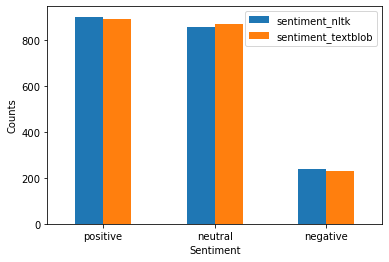

In [25]:
plt.figure(figsize = (20,10))
sentiment_df.plot.bar(x = 'sentiment', y = ['sentiment_nltk', 'sentiment_textblob'], rot = 0)
plt.ylabel('Counts')
plt.xlabel('Sentiment')
plt.show()